<a href="https://colab.research.google.com/github/mvince33/Coding-Dojo/blob/main/mock_belt_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
path = '/content/drive/MyDrive/Coding Dojo/03 Week 3: Exploratory Viz/literacy_rates_updated.csv'
df = pd.read_csv(path)
df.head()

,Region,Country,Year,Age,Gender,Literacy rate
0,Central and Southern Asia,Afghanistan,2011,<15,female,0.1761206
1,Central and Southern Asia,Afghanistan,2011,<15,male,0.454171
2,NaN,Afghanistan,2011,15-24,female,0.3211322
3,NaN,Afghanistan,2011,15-24,male,0.6187907
4,Central and Southern Asia,Afghanistan,2011,25-64,female,0.0841276


In [14]:
# Check for duplicates
df.duplicated().sum()
df[df.duplicated(keep = False)]
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [15]:
# Check for missing values
df.isna()
df.info()
df[df.isna().any(axis = 1)]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3303 entries, 0 to 3312
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Region         3299 non-null   object
 1   Country        3303 non-null   object
 2   Year           3303 non-null   object
 3   Age            3303 non-null   object
 4   Gender         3303 non-null   object
 5   Literacy rate  3298 non-null   object
dtypes: object(6)
memory usage: 180.6+ KB


,Region,Country,Year,Age,Gender,Literacy rate
2,NaN,Afghanistan,2011,15-24,female,0.3211322
3,NaN,Afghanistan,2011,15-24,male,0.6187907
312,NaN,Uzbekistan,2016,65+,female,0.9966975
313,NaN,Uzbekistan,2016,65+,male,0.9990176
498,Eastern and South-Eastern Asia,Singapore,2010,65+,male,NaN
608,Europe and Northern America,Albania,2012,15-24,female,NaN
753,Europe and Northern America,Portugal,2011,15-24,male,NaN
855,Europe and Northern America,Spain,2010,<15,female,NaN
884,Europe and Northern America,Spain,2013,25-64,male,NaN


In [16]:
# Check the Region column.
df.loc[df['Region'].isna(), :]

# We can use the entry in 'Country' to determine
# what to use for 'Region' for missing values.
# All the missing entries in 'Region' should be
# 'Central and Southern Asia'
df['Region'] = df['Region'].fillna('Central and Southern Asia')
df['Region'].isna().sum()

0

In [17]:
# Check the 'Literacy rate' column
print(df.loc[df['Literacy rate'].isna(), :])

# Check the literacy rates of people in Spain less than 65 years old
df.loc[(df['Country'] == 'Spain') & (df['Age'] != '65+'), 'Literacy rate'].sort_values()

# Check the literacy rates of Europeans between 15 and 64.
df.loc[(df['Region'] == 'Europe and Northern America') & (df['Age'] == '15-24'), 'Literacy rate'].sort_values()

# Check the literacy rates of people over 65 in Singapore
df.loc[(df['Country'] == 'Singapore') & (df['Age'] == '65+'), :].sort_values(by = 'Literacy rate')

# The literacy rate in Spain for those under 65 is between 97% and 100%
# The literacy rate in Europe and North America for people between 15 and 24 is also between 97% and 100%
# So we will impute the missing values in Europe with the average of the literacy
# rates in Spain for those under 65 and the average literacy for 15-24 year olds in
# Europe and North America.

# In 2010 the literace rate for men over 65 was about 94.6% The value in 2015 for men
# over 65 in Singapore is missing. The literacy rate for women over 65 in Singapore
# increased by about 12%. We will assume that "the rising tide lifts all boats" so men
# over 65 also enjoyed a significant increase in literacy.

# Based on the above observations we will impute the missing values for literacy rates 
# with the average literacy rate for the region 'Europe and Northern America.'

# Get the average literacy rate for the region 'Europe and Northern America'.
avg_lit_rate = df.loc[df['Region'] == 'Europe and Northern America', 'Literacy rate'].dropna().astype(float)
print()
avg_lit_rate = avg_lit_rate.mean()
avg_lit_rate

# Fill the missing values.
df.fillna(avg_lit_rate, inplace = True)

                             Region    Country  Year    Age  Gender  \
498  Eastern and South-Eastern Asia  Singapore  2010    65+    male   
608     Europe and Northern America    Albania  2012  15-24  female   
753     Europe and Northern America   Portugal  2011  15-24    male   
855     Europe and Northern America      Spain  2010    <15  female   
884     Europe and Northern America      Spain  2013  25-64    male   

    Literacy rate  
498           NaN  
608           NaN  
753           NaN  
855           NaN  
884           NaN  



In [18]:
# Confirm there are no missing values
df.isna().sum()

Region           0
Country          0
Year             0
Age              0
Gender           0
Literacy rate    0
dtype: int64

In [19]:
# We now ensure each column is of the correct data type
df.info()

# Fix the literacy rate column.
#df['Literacy rate'].astype(float)

# In the above step we found an inconsistency in the literacy rate column.
filter = df['Literacy rate'].str.contains('%').astype(bool)
df[filter]

# Not sure why .str.contains('%') included rows without percent signs.
# There seems to be only one offending row so we will adjust it manually.
df.loc[12, 'Literacy rate'] = 0.4538

# Now fix the literacy rate column
df['Literacy rate'] = df['Literacy rate'].astype(float)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3303 entries, 0 to 3312
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Region         3303 non-null   object
 1   Country        3303 non-null   object
 2   Year           3303 non-null   object
 3   Age            3303 non-null   object
 4   Gender         3303 non-null   object
 5   Literacy rate  3303 non-null   object
dtypes: object(6)
memory usage: 180.6+ KB


In [20]:
# Check that the Literacy rate column has been fixed
df.info()

# We need to fix the year column now.
#df['Year'] = df['Year'].astype(int)

# The above step revealed a year with an inderscore
filter = df['Year'].str.contains('_')
df.loc[filter, 'Year']

# Replace the underscore with an empyt space
df['Year'] = df['Year'].str.replace('_', '')

# Now convert years to ints
df['Year'] = df['Year'].astype(int)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3303 entries, 0 to 3312
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         3303 non-null   object 
 1   Country        3303 non-null   object 
 2   Year           3303 non-null   object 
 3   Age            3303 non-null   object 
 4   Gender         3303 non-null   object 
 5   Literacy rate  3303 non-null   float64
dtypes: float64(1), object(5)
memory usage: 309.7+ KB


In [21]:
# Check that the columns match the data dictionary
df.info()

# They do, so on to the next step!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3303 entries, 0 to 3312
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         3303 non-null   object 
 1   Country        3303 non-null   object 
 2   Year           3303 non-null   int64  
 3   Age            3303 non-null   object 
 4   Gender         3303 non-null   object 
 5   Literacy rate  3303 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 309.7+ KB


In [22]:
# Check for inconsistenties in the categorical values
df.nunique()

# Check the regions first
df['Region'].value_counts()

Latin America and the Caribbean     940
Sub-Saharan Africa                  770
Northern Africa and Western Asia    568
Europe and Northern America         336
Central and Southern Asia           311
Eastern and South-Eastern Asia      282
Oceania                              96
Name: Region, dtype: int64

In [23]:
# Check the countries next
df['Country'].str.upper().value_counts()
df['Country'].str.lower().value_counts()
df['Country'].value_counts()

# All the above commands give a dataframe with 155 rows
# so there are no case errors in the country names.

# At this point in the course I don't think we would 
# be expected to deal with more subtle cases such as 
# a spelling error or extra character when .value_counts()
# has dozens of values so on to the next task!

Mexico                 72
Uruguay                72
Brazil                 72
Palestine              64
Turkey                 64
                       ..
Trinidad and Tobago     8
Greece                  8
Estonia                 8
Hungary                 8
Antigua and Barbuda     4
Name: Country, Length: 155, dtype: int64

In [24]:
# We already converted years to ints so there shouldn't
# be any strange characters showing up. We check the
# number of values to be sure.
df['Year'].value_counts()

# Good think we looked! It seems reasonable to conclud that 
# 3014 should be 2014
df['Year'].replace(3014, 2014, inplace = True)

# Confirm the Years column has been fixed.
df['Year'].value_counts()

2018    574
2011    455
2014    440
2010    400
2012    344
2015    316
2013    264
2016    264
2017    246
Name: Year, dtype: int64

In [25]:
# Now we check the 'Gender' column.
df['Gender'].value_counts()

# Clearly F is for female and M is for male
df['Gender'].replace('F', 'female', inplace = True)
df['Gender'].replace('M', 'male', inplace = True)

# Confirm we made the changes
df['Gender'].value_counts()

female    1652
male      1651
Name: Gender, dtype: int64

In [26]:
# Check the 'Age' column.
df['Age'].value_counts()

# Looks good so we can move on.

<15      840
15-24    826
25-64    826
65+      811
Name: Age, dtype: int64

In [27]:
# Check the literacy rate column to make 
# sure the values are between 0 and 1.
(df['Literacy rate'] < 0).sum()
(df['Literacy rate'] > 1).sum()
# Probably better to just use the .describe() 
# method for the above.

# Check the info method one more time
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3303 entries, 0 to 3312
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         3303 non-null   object 
 1   Country        3303 non-null   object 
 2   Year           3303 non-null   int64  
 3   Age            3303 non-null   object 
 4   Gender         3303 non-null   object 
 5   Literacy rate  3303 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 309.7+ KB


Text(0.5, 0, 'Literacy Rate')

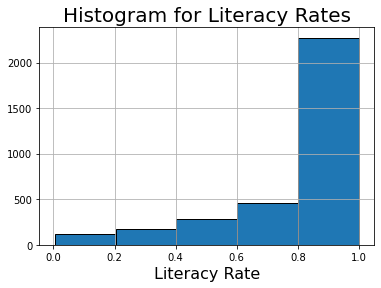

In [28]:
# Make a histogram for literacy rates
df['Literacy rate'].hist(bins = 5, edgecolor = 'k')
plt.title('Histogram for Literacy Rates', fontsize = 20)
plt.xlabel('Literacy Rate', fontsize = 16)

# This is a left-skewed histogram. It shows us that the 
# about 2300 nations have literacy rates between 80% 
# and 100%. It also shows us that low literacy rates 
# are rare, but still significant.

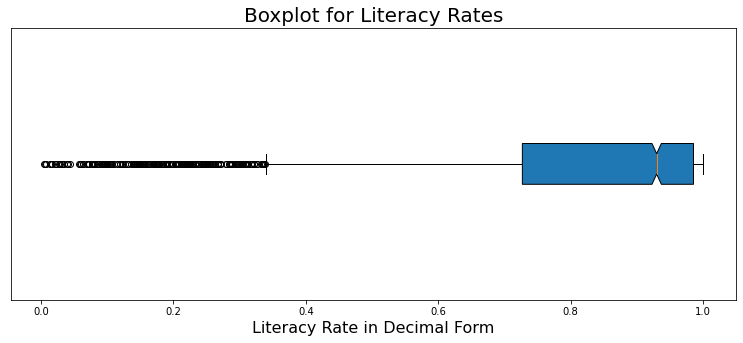

In [29]:
# Make a boxplot for the literacy rates
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (13, 5));
ax.boxplot(df['Literacy rate'],
           vert = False,
           patch_artist = True,
           notch = True);
ax.set_title('Boxplot for Literacy Rates', fontsize = 20);
plt.xlabel('Literacy Rate in Decimal Form', fontsize = 16)
plt.yticks([]);

# The boxplot tells us that half the nations in the world have 
# literacy rates above 92% or so. 75% of nations have literacy 
# rates above 70%. 

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


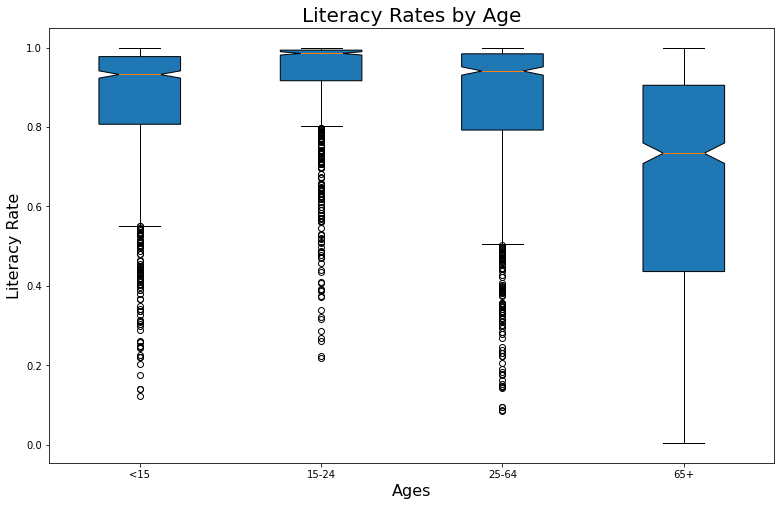

In [30]:
# We make boxplots for literacy by age group
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (13, 8));
ages = df['Age'].value_counts().index
literacy_by_age = [df.loc[df['Age'] == age, 'Literacy rate'] for age in ages]
ax.boxplot(literacy_by_age,
           labels = ages,
           patch_artist = True,
           notch = True);
plt.xlabel('Ages', fontsize = 16);
plt.ylabel('Literacy Rate', fontsize = 16);
plt.title('Literacy Rates by Age', fontsize = 20);

# These boxplots tell us that the top 75% of literacy rates for those under 65
# is around 80%, and that the "standard" definition of outlier suggests that 
# illiteracy is uncommon in much of the world. While the IQR is greater for those
# over 65, we still have that the literacy rate is above 70% for people over 65 in 
# the top 50% of nations.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


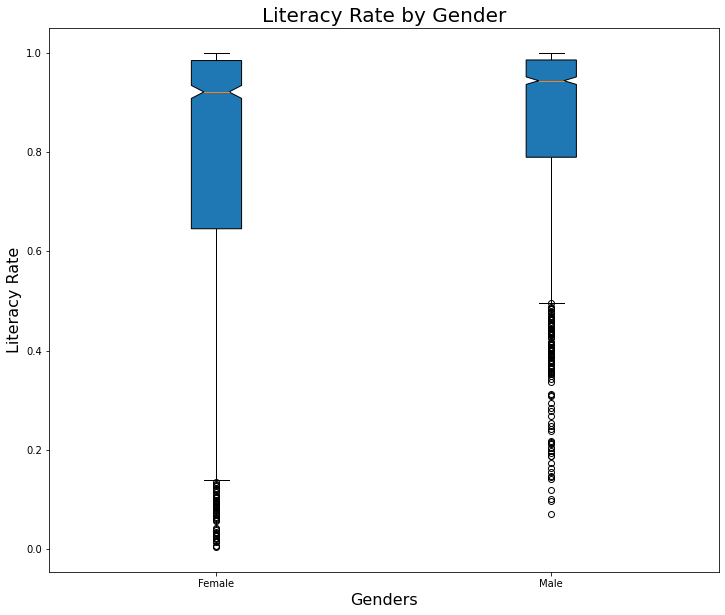

In [31]:
# We now construct boxplots for literacy rate by gender

# Format the data for the boxplots
genders = df['Gender'].value_counts().index
lit_rate_by_gender = [df.loc[df['Gender'] == gender, 'Literacy rate'] for gender in genders]

# Construct the boxplots
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 10));
ax.boxplot(lit_rate_by_gender,
           labels = ['Female', 'Male'],
           patch_artist = True,
           notch = True);
plt.xlabel('Genders', fontsize = 16);
plt.ylabel('Literacy Rate', fontsize = 16);
plt.title('Literacy Rate by Gender', fontsize = 20);

# These boxplots tell us that while illiteracy is more common among women,
# the top 50% of nations all have similar literacy rates for men and women.
# We also see that the top 75% of nations have literacy rates for women above 65%
# and literacy rates for men above 78% or so.